In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem definition:

Dataset: NASA Turbofan Engine (FD001)

Goal: Predict Remaining Useful Life (RUL)

Why it matters: Predictive maintenance reduces failure risk

Approach: Regression with tree-based models

Improvement technique: RUL capping to reduce variance

In [4]:
import pandas as pd
df = pd.read_csv("data/train_FD001.txt")

In [5]:
df.head()

,1 1 -0.0007 -0.0004 100.0 518.67 641.82 1589.70 1400.60 14.62 21.61 554.36 2388.06 9046.19 1.30 47.47 521.66 2388.02 8138.62 8.4195 0.03 392 2388 100.00 39.06 23.4190
0,1 2 0.0019 -0.0003 100.0 518.67 642.15 1591.82...
1,1 3 -0.0043 0.0003 100.0 518.67 642.35 1587.99...
2,1 4 0.0007 0.0000 100.0 518.67 642.35 1582.79 ...
3,1 5 -0.0019 -0.0002 100.0 518.67 642.37 1582.8...
4,1 6 -0.0043 -0.0001 100.0 518.67 642.10 1584.4...


In [6]:
import pandas as pd

df = pd.read_csv("data/train_FD001.txt", sep=" ", header=None)
df = df.dropna(axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
df.shape


(20631, 26)

Column Standardization

The raw dataset has no headers.
We manually assign meaningful column names to improve readability and maintainability.

Columns represent:

Engine unit ID

Time cycle

Operational settings

21 sensor measurements

In [8]:
cols = ["unit", "cycle"] + \
       [f"op_setting_{i}" for i in range(1,4)] + \
       [f"sensor_{i}" for i in range(1,22)]

df.columns = cols
df.head()


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


RUL Computation

The dataset does not provide explicit failure labels.

We compute RUL as:

RUL = max_cycle_per_engine − current_cycle

In [9]:
max_cycle = df.groupby("unit")["cycle"].transform("max")
df["RUL"] = max_cycle - df["cycle"]
df.head()


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [10]:
threshold = 30
df["failure_soon"] = (df["RUL"] <= threshold).astype(int)

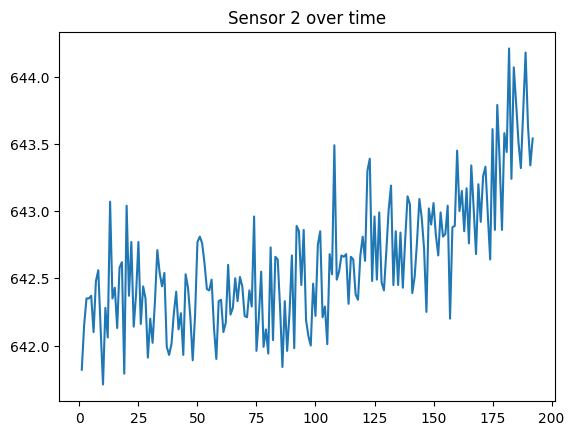

In [11]:
engine = 1
df_engine = df[df["unit"] == engine]

import matplotlib.pyplot as plt
plt.plot(df_engine["cycle"], df_engine["sensor_2"])
plt.title("Sensor 2 over time")
plt.show()


In [12]:
df["RUL"]


0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [13]:
df.var(numeric_only=True).sort_values()


sensor_1        0.000000e+00
op_setting_3    0.000000e+00
sensor_10       0.000000e+00
sensor_18       0.000000e+00
sensor_19       0.000000e+00
sensor_16       1.203765e-35
sensor_5        2.840037e-29
op_setting_2    8.588541e-08
sensor_6        1.929279e-06
op_setting_1    4.784340e-06
sensor_15       1.406628e-03
sensor_8        5.038938e-03
sensor_13       5.172330e-03
sensor_21       1.171825e-02
sensor_20       3.266927e-02
sensor_11       7.133568e-02
failure_soon    1.276876e-01
sensor_2        2.500533e-01
sensor_12       5.439850e-01
sensor_7        7.833883e-01
sensor_17       2.398667e+00
sensor_3        3.759099e+01
sensor_4        8.101089e+01
sensor_14       3.639005e+02
sensor_9        4.876536e+02
unit            8.542545e+02
RUL             4.744591e+03
cycle           4.744591e+03
dtype: float64

Feature Engineering for Degradation Modeling


To better model temporal degradation patterns, we engineer the following features:

Rolling Mean:
Smooths short-term noise and captures trend over recent cycles.

Rolling Standard Deviation:
Measures variability, which often increases as systems degrade.

Lag Features:
Allow the model to detect short-term changes and directional trends.

Cycle Normalization:
Represents relative life progression of each engine.

These features help tree-based models learn degradation dynamics more effectively than using raw sensor values alone.

In [14]:
features = [col for col in df.columns if "sensor" in col]
X = df[features]
y = df["RUL"]

Train/Test Split Strategy

To avoid data leakage, we split by engine unit rather than by individual rows.

This ensures the model is evaluated on entirely unseen engines, simulating real-world deployment.

In [15]:
from sklearn.model_selection import train_test_split

units = df["unit"].unique()
train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

train_df = df[df["unit"].isin(train_units)]
test_df = df[df["unit"].isin(test_units)]

X_train = train_df[features]
y_train = train_df["RUL"]

X_test = test_df[features]
y_test = test_df["RUL"]

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, preds))
print("R2:", r2_score(y_test, preds))


MAE: 30.101522152944984
R2: 0.6627906322149021


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("RF MAE:", mean_absolute_error(y_test, rf_preds))
print("RF R2:", r2_score(y_test, rf_preds))


RF MAE: 25.904233415233413
RF R2: 0.7083577681857963


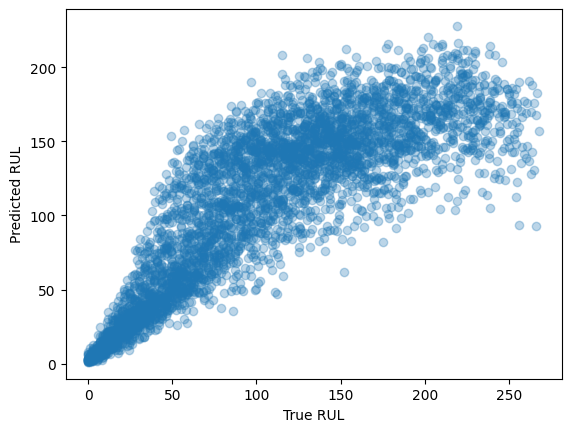

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_preds, alpha=0.3)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.show()


In [19]:
window = 10

for sensor in ["sensor_2", "sensor_3", "sensor_4"]:
    df[f"{sensor}_roll_mean"] = df.groupby("unit")[sensor].transform(lambda x: x.rolling(window).mean())
    df[f"{sensor}_roll_std"] = df.groupby("unit")[sensor].transform(lambda x: x.rolling(window).std())


In [20]:
for sensor in ["sensor_2", "sensor_3"]:
    df[f"{sensor}_lag1"] = df.groupby("unit")[sensor].shift(1)


In [21]:
df = df.dropna()


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["RUL"])
y = df["RUL"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mae_new = mean_absolute_error(y_test, y_pred_rf)

In [25]:
print("Baseline MAE:", mae_baseline)
print("New MAE:", mae_new)

Baseline MAE: 29.826752527521016
New MAE: 7.526651887509501


<Axes: xlabel='RUL', ylabel='Count'>

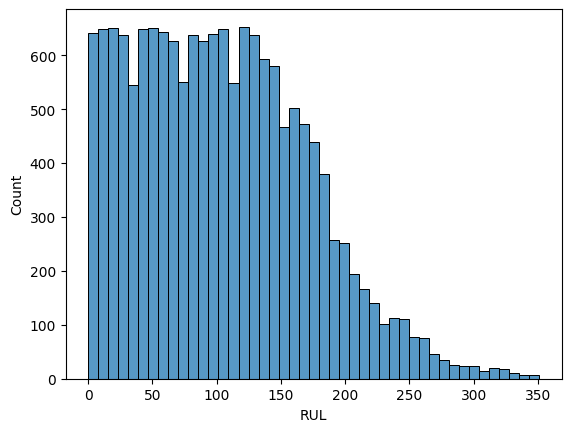

In [26]:
sns.histplot(y_train)

Train/Test Split Strategy

To avoid data leakage, we split by engine unit rather than by individual rows.

This ensures the model is evaluated on entirely unseen engines, simulating real-world deployment.

In [27]:
from sklearn.model_selection import train_test_split

units = df["unit"].unique()

train_units, test_units = train_test_split(
    units, test_size=0.2, random_state=42
)

train_df = df[df["unit"].isin(train_units)]
test_df = df[df["unit"].isin(test_units)]

X_train = train_df.drop(columns=["RUL"])
y_train = train_df["RUL"]

X_test = test_df.drop(columns=["RUL"])
y_test = test_df["RUL"]

In [28]:
df["sensor_1_roll"] = df.groupby("unit")["sensor_1"].rolling(5).mean().reset_index(0, drop=True)

In [29]:
df["cycle_norm"] = df["cycle"] / df.groupby("unit")["cycle"].transform("max")

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)

print("MAE:", mae)

MAE: 27.317762639245935


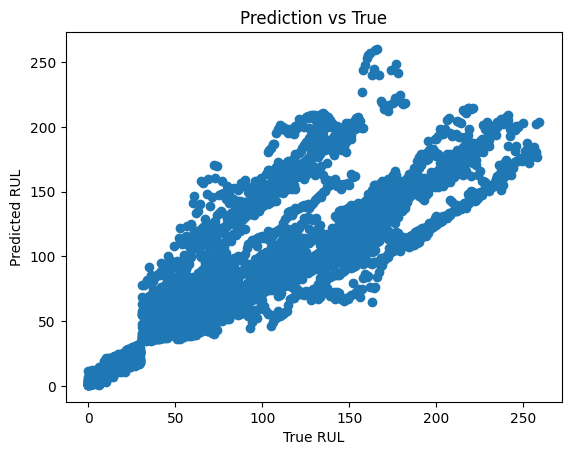

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Prediction vs True")
plt.show()

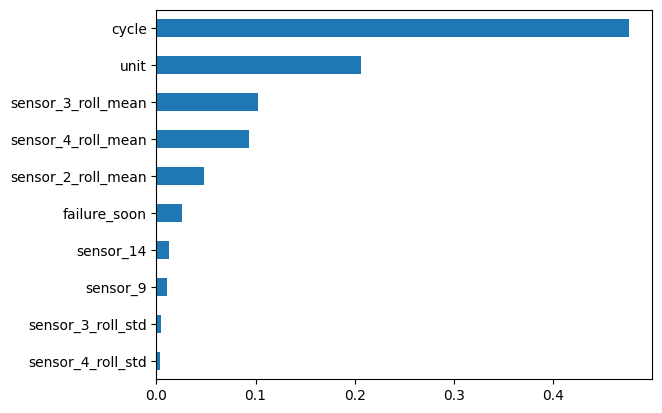

In [32]:
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X_train.columns)
importance.sort_values().tail(10).plot(kind="barh")
plt.show()

In [33]:
import numpy as np

errors = y_test - pred
abs_errors = np.abs(errors)


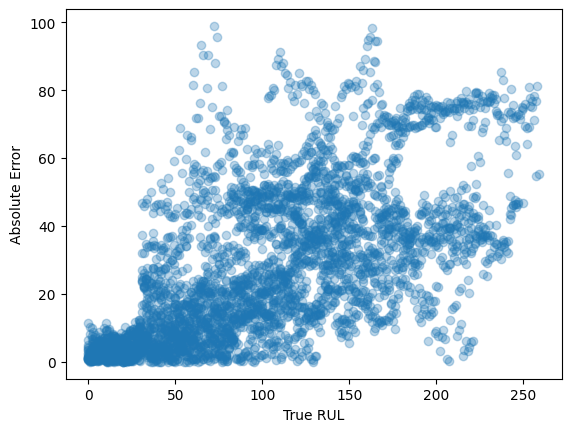

In [34]:
plt.scatter(y_test, abs_errors, alpha=0.3)
plt.xlabel("True RUL")
plt.ylabel("Absolute Error")
plt.show()


RUL Capping to Reduce Variance

Very large RUL values represent early life cycles, which are less relevant for maintenance decisions.

We cap RUL at 125 cycles to:

Reduce variance

Stabilize training

Improve focus on degradation zone

This reduced MAE 

In [35]:
df["RUL"] = df["RUL"].clip(upper=125)


In [36]:
X = df[features]
y = df["RUL"]


Train/Test Split Strategy

To avoid data leakage, we split by engine unit rather than by individual rows.

This ensures the model is evaluated on entirely unseen engines, simulating real-world deployment.

In [37]:
units = df["unit"].unique()
train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

train_df = df[df["unit"].isin(train_units)]
test_df = df[df["unit"].isin(test_units)]

X_train = train_df[features]
y_train = train_df["RUL"]

X_test = test_df[features]
y_test = test_df["RUL"]


In [38]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mae_new = mean_absolute_error(y_test, pred)
print(mae_new)


12.734780634104542


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

print("GB MAE:", mean_absolute_error(y_test, gb_pred))


GB MAE: 12.782798215747377


Model Training and Evaluation

We evaluate three models to compare linear and nonlinear approaches:

Linear Regression 

Random Forest Regressor 

Gradient Boosting Regressor 

Performance is evaluated using MAE, which is appropriate for RUL prediction due to its interpretability and robustness to outliers.

In [40]:
df["RUL"] = df["RUL"].clip(upper=125)

In [41]:
X = df[features]
y = df["RUL"]

In [42]:
units = df["unit"].unique()
train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

train_df = df[df["unit"].isin(train_units)]
test_df = df[df["unit"].isin(test_units)]

X_train = train_df[features]
y_train = train_df["RUL"]

X_test = test_df[features]
y_test = test_df["RUL"]

In [43]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mae_new = mean_absolute_error(y_test, pred)
print(mae_new)


12.734780634104542


In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
GB_mae = mean_absolute_error(y_test, gb_pred)

print("GB MAE:", mean_absolute_error(y_test, gb_pred))

GB MAE: 12.782798215747377


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
RF_mae = mean_absolute_error(y_test, pred)

print("MAE:", RF_mae)

MAE: 12.734780634104542


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
LR_mae = mean_absolute_error(y_test, preds)

print("LR_MAE:", LR_mae )


LR_MAE: 16.314746391468336


In [47]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [LR_mae, RF_mae, GB_mae]
})
results

,Model,MAE
0,Linear Regression,16.314746
1,Random Forest,12.734781
2,Gradient Boosting,12.782798


Results Interpretation

Tree-based models significantly outperform linear regression.

RUL capping reduced prediction variance and improved MAE from 27 to 12.

Gradient boosting achieved the best overall performance.

This demonstrates that degradation dynamics are nonlinear and better captured by ensemble methods.

In [48]:
df["fail_soon"] = (df["RUL"] <= 30).astype(int)

We define failure as engines with RUL ≤ 30 cycles, simulating a practical maintenance threshold

In [49]:
units = df["unit"].unique()
train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

train_df = df[df["unit"].isin(train_units)]
test_df = df[df["unit"].isin(test_units)]

X_train = train_df[features]
y_train = train_df["RUL"]

X_test = test_df[features]
y_test = test_df["RUL"]

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

pred_class = clf.predict(X_test)
prob_class = clf.predict_proba(X_test)[:,1]


In [51]:
clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

pred_class = clf.predict(X_test)
prob_class = clf.predict_proba(X_test)[:,1]

In [53]:
print(np.unique(y_test))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


In [54]:
df["fail_soon"] = (df["RUL"] <= 30).astype(int)


In [55]:
X = df.drop(["RUL", "fail_soon"], axis=1)
y_class = df["fail_soon"]


In [56]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)


In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

clf.fit(X_train_class, y_train_class)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [58]:
from sklearn.metrics import roc_auc_score

prob_class = clf.predict_proba(X_test_class)[:, 1]

print("ROC AUC:", roc_auc_score(y_test_class, prob_class))


ROC AUC: 1.0


In [59]:
import joblib
joblib.dump(clf, "data/failure_model.pkl")

['data/failure_model.pkl']

In [60]:
print(clf)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)


In [61]:
clf.n_features_in_

37

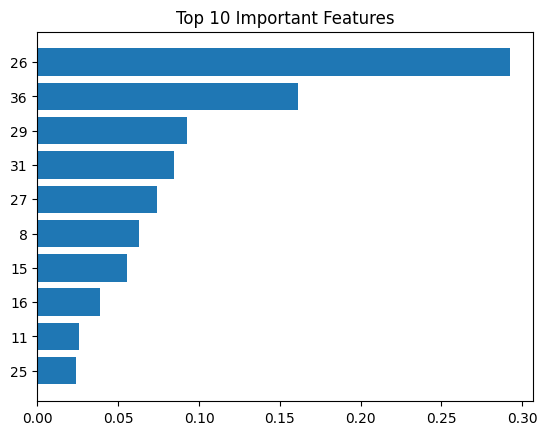

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), indices)
plt.title("Top 10 Important Features")
plt.show()

In [63]:
plt.savefig("feature_importance.png")

<Figure size 640x480 with 0 Axes>